# Analyzing the Hotel Bookings Data Set using Python

By: Thomas Simon

First, we'll start with inputting the Python libraries.

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
import matplotlib.axes as ax
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

**Data Cleansing**

The data set already looks clean, so we'll move to understanding the insights.

**Insights**

Here, we'll look at a descriptive overview of the dataset and it's respective columns.

In [6]:
dataframe_raw = pd.read_csv("Hotel Bookings - Capstone 2 Data Set, Thomas Simon.csv", header = 0)
dataframe_raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [21]:
dataframe_raw.groupby('arrival_date_month').sum().reset_index()

,arrival_date_month,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,April,4524,1051491,22361085,177392,180852,10520,26815,20806,1141.0,...,283,472,1427,2503,877243.0,134285.0,33405,1113122.58,633,5783
1,August,5239,1681028,27977068,463805,217742,14716,39361,27795,2780.0,...,223,948,774,3674,1107060.0,28659.0,5533,1944327.60,1000,10223
2,December,2371,498746,13665560,346440,108822,5865,15984,12382,736.0,...,314,631,1256,1596,509016.0,57622.0,20391,549700.54,502,4163
3,February,2696,386131,16269265,59795,127071,6883,17572,14450,790.0,...,411,607,1427,1548,562001.0,156216.0,6171,593661.80,509,4241
4,January,1807,268643,11956545,17711,95560,4621,12997,10024,452.0,...,397,530,1807,1469,462901.0,91852.0,14979,417171.80,491,3246
5,July,4742,1725980,25527113,367133,203974,14184,35521,25164,2322.0,...,301,1476,1600,2756,1044177.0,48350.0,2911,1605263.03,869,8505
6,June,4535,1402897,22058671,268613,165390,10068,29048,20353,1057.0,...,282,236,1703,2103,888463.0,85234.0,21387,1276277.11,609,6169
7,March,3149,686748,19749674,113515,159987,8410,25079,17675,700.0,...,426,266,1806,2173,723446.0,158391.0,13486,790176.45,603,4872
8,May,4677,1387166,23776969,239006,189001,10254,28380,21539,845.0,...,366,216,1831,2561,897372.0,151826.0,51162,1281628.83,614,6280
9,November,2122,520290,13694364,316990,98052,5334,16333,11488,279.0,...,293,263,1084,1690,525705.0,157413.0,12010,501362.97,457,3949


Here, we can see the total sum of cancellations for each month in addition to some other descriptive statistics figures.

Next, we'll look at the number of cancellations for specifically months April through August as they tend to have the greatest amount of cancellations total.

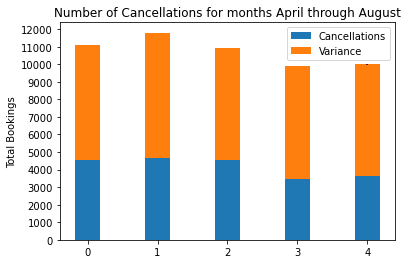

In [9]:
df = dataframe_raw

monthCols = ('April', 'May', 'June', 'July', 'August')
monthCount = len(monthCols)
N = monthCount

#monthFilter = (df.arrival_date_month == 'May') | (df.arrival_date_month == 'June') | (df.arrival_date_month == 'July') | (df.arrival_date_month == 'August')
#cancellations = df.loc[monthFilter, 'is_canceled'] # (4524, 4677, 4535, 3483, 3641)

April  = df.loc[df.arrival_date_month == 'April',  'is_canceled']
May    = df.loc[df.arrival_date_month == 'May',    'is_canceled']
June   = df.loc[df.arrival_date_month == 'June',   'is_canceled']
July   = df.loc[df.arrival_date_month == 'July',   'is_canceled']
August = df.loc[df.arrival_date_month == 'August', 'is_canceled']

varApril  = April.var(axis=0)
varMay    = May.var(axis=0)
varJune   = June.var(axis=0)
varJuly   = July.var(axis=0)
varAugust = August.var(axis=0)

stdApril  = April.std(axis=0)
stdMay    = May.std(axis=0)
stdJune   = June.std(axis=0)
stdJuly   = July.std(axis=0)
stdAugust = August.std(axis=0)

ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, cancellations, width, yerr=cancellationsStd                      )
p2 = plt.bar(ind, variance,      width, yerr=varianceStd,      bottom=cancellations)

plt.ylabel('Total Bookings')
plt.title('Number of Cancellations for months April through August')
plt.xticks(ind)
plt.yticks(np.arange(0, 13000, 1000))
plt.legend((p1[0], p2[0]), ('Cancellations', 'Variance'))

plt.show()

This stacked column chart shows us that these 5 months tend to have similar proportions of cancellations to overall bookings. The reason why the other months were not included is because they were skewed toward fewer cancellations relative to bookings.


Then, we'll take a look at the total number of cancellations by market segment.

In [22]:
df = dataframe_raw

objects = ('Online TA', 'Groups', 'Corporate', 'Direct', 'Offline TA/TO', 'Complementary', 'Aviation')
y_pos = np.arange(len(objects))
performance_counts = []

# get the count of cancelations for each object
for current_object in objects:
    print(current_object)
    current_df = df[df.market_segment == current_object]
    print(len(current_df))
    print()
    is_canceled = current_df.is_canceled == 1
    is_canceled_count = len(is_canceled)
    performance_counts.append(is_canceled_count)

Online TA
56477

Groups
19811

Corporate
5295

Direct
12606

Offline TA/TO
24219

Complementary
743

Aviation
237



Here, we're just looking at each market segment and how many cancellations there were within each. Next, we'll dive into a column chart visual to better understand each standing.

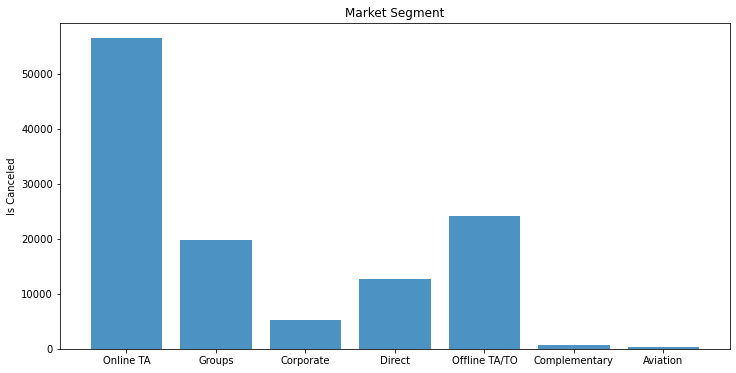

In [13]:
f, ax = plt.subplots(figsize=(12, 6))
plt.bar(y_pos, performance_counts, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Is Canceled')
plt.title('Market Segment')

plt.show()

Online TA (Online Travel Agents) seem to be the most notable outlier since they're the only segment above the 3k cancellation mark, making it almost double the problem as other markets.

After that, we'll make a pie chart to understand which market segments most incur revenue loss as a result of these cancellations.

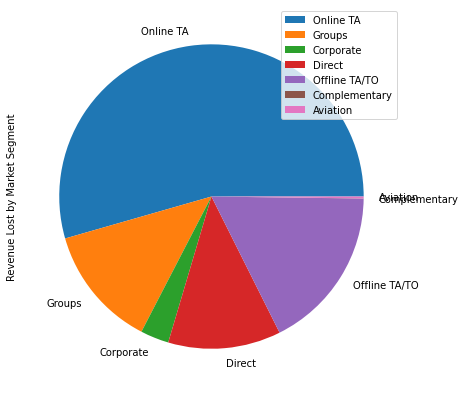

In [14]:
revenues_lost = []

for current_object in objects:
    current_df = df[df.market_segment == current_object]

    is_canceled = current_df.is_canceled == 1
    cancel_freq = len(is_canceled)
    current_adr_avg = current_df.adr.mean()
    current_rev_lost = cancel_freq * current_adr_avg
    
    revenues_lost.append(current_rev_lost)

pie_df = pd.DataFrame(
    {
        'Revenue Lost by Market Segment': revenues_lost,
        'radius': revenues_lost
    },
    index=objects
)
plot = pie_df.plot.pie(y='Revenue Lost by Market Segment', figsize=(len(revenues_lost), len(revenues_lost)))

Here are the market segments again, though in pie chart form, explaining the percentage of revenue that is lost as a result of cancellations. With over 50% coming from Online TA, diving further into how to mitigate the problem there is the a priority. Then, we should dive into Offline Travel Agents and Groups, etc.

Now, we'll look at how each of the variables correlate to each other.

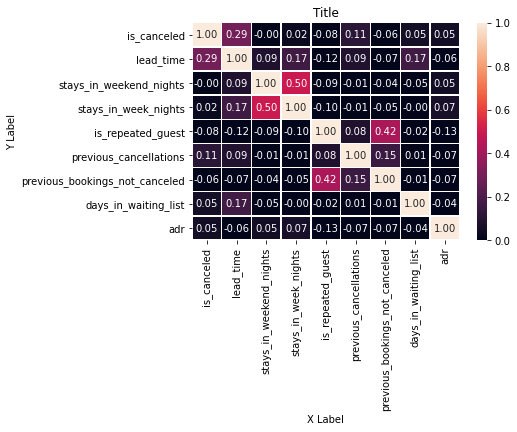

In [15]:
dataframe_raw = pd.read_csv("Hotel Bookings - Capstone 2 Data Set, Thomas Simon.csv", header = 0)

dataframe_heatmap = dataframe_raw
dataframe_heatmap = dataframe_heatmap.drop(columns=['booking_changes','required_car_parking_spaces','total_of_special_requests','children','adults','babies','agent','company','arrival_date_day_of_month','reservation_status_date', 'arrival_date_year', 'arrival_date_week_number'])
dataframe_heatmap = dataframe_heatmap.corr()
ax = sns.heatmap(dataframe_heatmap, vmin=0, vmax=1, annot=True, fmt=".2f", linewidths=.5)
plt.title("Title")
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.show()

Interestingly enough, there is zero correlation. This probably means we should focus instead in the distribution of the sales of hotel rooms through the different market segments, agents, etc. to better understand where the cancellation problem stems from.

Lastly, we'll make a line chart to look into City Hotels and how cancellations play a role month to month.

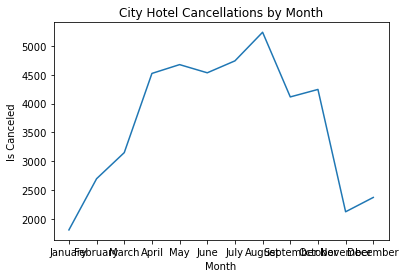

In [16]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_cancellations = []

df_cancellations = df[df.is_canceled==1]

for month in months:
    current_month_cancellation = df_cancellations[df_cancellations.arrival_date_month==month]
    current_month_cancellation_count = len(current_month_cancellation)
    month_cancellations.append(current_month_cancellation_count)

plt.plot(months, month_cancellations)
plt.title('City Hotel Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Is Canceled')
plt.show()